# Training Data Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
from textstat.textstat import textstat
from gensim.corpora import wikicorpus
%matplotlib inline
# Make it pretty
plt.style.use('ggplot')

/Users/austin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/austin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
file = '../data/enwiki.observations.text_wp10.30k.tsv'
data = pd.read_csv(file, sep='\t', header=None)

In [3]:
data = pd.DataFrame(data=list(data[0].apply(literal_eval)))

## Check for NaNs

In [5]:
data.isnull().values.any()

False

## Plot distibutions of data

### Labels

In [6]:
data['label'].value_counts()

fa       4921
stub     4917
b        4916
start    4913
c        4908
ga       4893
Name: label, dtype: int64

<BarContainer object of 6 artists>

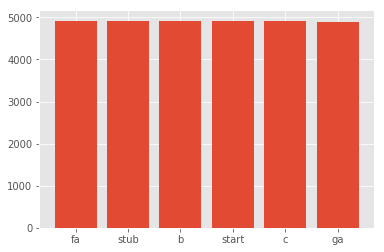

In [7]:
label_dist = data['label'].value_counts()
x = label_dist.index
y = label_dist.values
fig, ax = plt.subplots()
ax.bar(x, y)

In [8]:
data['project'].nunique()

1714

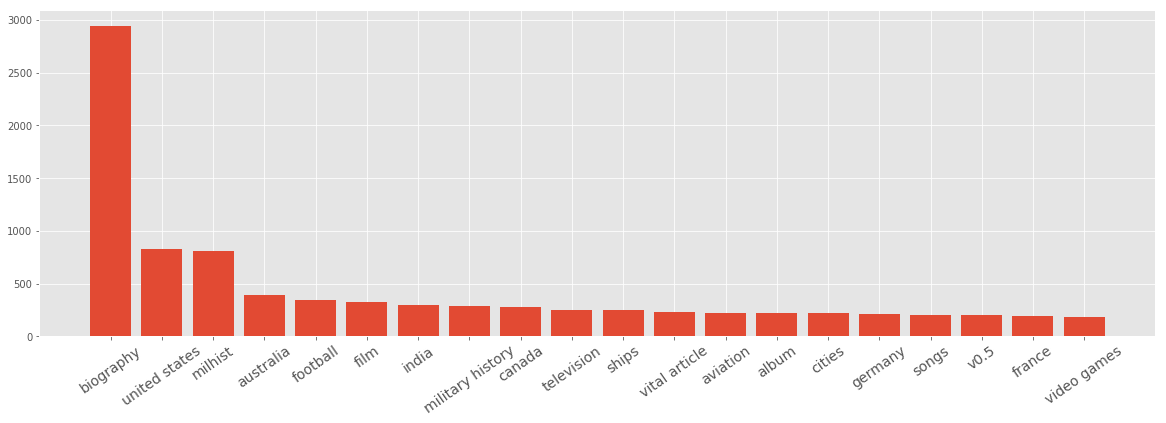

In [33]:
project_dist = (data['project'].value_counts())[:20]
x = project_dist.index
y = project_dist.values
fig, ax = plt.subplots(figsize=(20,6))
ax.bar(x, y)
ax.set_xticklabels(x, rotation=35, fontsize=14)
plt.show()

In [4]:
def clean_wiki_markup(raw_article):
    semi_cleaned_article = wikicorpus.filter_wiki(raw_article)
    cleaned_article = semi_cleaned_article.replace("\n", "").replace("\'", "").replace("()", "").replace("=", "").replace("|alt","").replace("\xa0","")
    return cleaned_article

def find_num_categories(raw_article):
    return raw_article.count("[[Category:")

def find_num_images(raw_article):
    return raw_article.count("[[Image:")

def find_num_ISBN(raw_article):
    return raw_article.count("ISBN")

def find_num_references(raw_article):
    return raw_article.count("</ref>")

def find_article_length(cleaned_article):
    return len(cleaned_article)

def find_num_difficult_words(cleaned_article):
    return textstat.difficult_words(cleaned_article)

def find_dale_chall_readability_score(cleaned_article):
    return textstat.dale_chall_readability_score(cleaned_article)

def find_automated_readability_index(cleaned_article):
    return textstat.automated_readability_index(cleaned_article)

def find_linsear_write_formula(cleaned_article):
    return textstat.linsear_write_formula(cleaned_article)

def find_gunning_fog_index(cleaned_article):
    return textstat.gunning_fog(cleaned_article)

def find_syllable_count(cleaned_article):
    return textstat.syllable_count(cleaned_article)

def find_lexicon_count(cleaned_article):
    return textstat.lexicon_count(cleaned_article, removepunct=True)

def find_sentence_count(cleaned_article):
    return textstat.sentence_count(cleaned_article)

def find_smog_index(cleaned_article):
    return textstat.smog_index(cleaned_article)

def find_num_web_citations(raw_article):
    return raw_article.count("{{cite web")

def find_num_book_citations(raw_article):
    return raw_article.count("{{cite book")

def find_num_news_citations(raw_article):
    return raw_article.count("{{cite news")

def find_num_quotes(raw_article):
    return raw_article.count("quote=")

def find_num_h3_headers(raw_article):
    return raw_article.count("\n===")

def find_num_internal_links(raw_article):
    return (raw_article.count("[[") // 2)

def find_num_h2_headers(raw_article):
    return (raw_article.count("\n==") - find_num_h3_headers(raw_article))

In [5]:
data['cleaned_text'] = data['text'].apply(clean_wiki_markup)
data['lexicon_count'] = data['cleaned_text'].apply(find_lexicon_count)
data['sentence_count'] = data['cleaned_text'].apply(find_sentence_count)
data['article_length'] = data['text'].apply(find_article_length)
data['num_difficult_words'] = data['cleaned_text'].apply(find_num_difficult_words)

In [ ]:
data[data['sentence_count'] <= 1]
data.loc[28225, :]
data[data['article_length'] <= 10]
data[data['article_length'] <= 100].groupby(by='label').count()

In [ ]:
json_col = raw_data.loc[:,0]
raw_data.loc[29191, 0]

In [96]:
data['text'][27135]

"{{Expand Spanish|Singerman|date=January 2011}}\n'''Singermann, Singerman''' is Jewish surname means [[hazzan]].\n\n* [[Felix Singermann]] (1888, Posen - 1942, Riga), a German rabbi<ref>[[:de:Felix Singermann]]</ref>\n\n* [[Berta Singerman|Berta Singerman Begun]] (1901, Minsk - 1998, Buenos Aires)<ref>[[:es:Berta Singerman]]</ref>\n* [[Glitter Pals|Mookie Singerman]]\n* [[Beth Sholom Congregation (Frederick, Maryland)|Murray Singerman]]\n* [[Paulina Singerman|Paulina Singerman Begun]] (1911, Buenos Aires - 1984, Buenos Aires)<ref>[[:es:Paulina Singerman]]</ref>\n* [[Philip Singerman]]\n* [[Robert Singerman]] (born 1942), a professor, a recognized Judaica bibliographer\n** [[Singerman list]], a numeric cataloging system for antisemitica items, as defined by the 1982 bibliographic listing\n** [[The Jewish Bolshevism|Singerman 0121]]\n* [[Sydney Singerman]] (1896, Manchester - 1996), an editor\n* [[Wesley Singerman|Wesley Steven Singerman]] (born 1990), an American voice actor\n\n== Refer

In [6]:
data.shape

(29468, 10)

In [91]:
data = data[data['text'] != ""]
data = data[data['text'].str.contains("#redirect") == False]
data = data[data['text'].str.contains("may refer to:\n\n*") == False]
data = data[data['text'].str.contains("can refer to:\n") == False]
data = data[data['text'].str.contains("could refer to:\n") == False]
data = data[data['text'].str.contains("#REDIRECT") == False]
data = data[data['text'].str.contains("== Matches ==\n:") == False]
data = data[data['text'].str.contains("{{underconstruction") == False]

In [92]:
data.shape

(29353, 10)

In [93]:
(data[data['sentence_count'] <= 1]).groupby(by='label').count()

,page_title,project,text,timestamp,cleaned_text,lexicon_count,sentence_count,article_length,num_difficult_words
label,,,,,,,,,
b,3,3,3,3,3,3,3,3,3
c,7,7,7,7,7,7,7,7,7
fa,4,4,4,4,4,4,4,4,4
ga,5,5,5,5,5,5,5,5,5
start,19,19,19,19,19,19,19,19,19
stub,319,319,319,319,319,319,319,319,319


In [108]:
test = data[data['sentence_count'] <= 1]

In [109]:
test[test['label'] == 'fa']

,label,page_title,project,text,timestamp,cleaned_text,lexicon_count,sentence_count,article_length,num_difficult_words
7501,fa,Kant (surname),poland,'''Kant''' is surname of:\n\n'''People:'''\n* ...,20110418042415,"Kant is surname of:People:* Agnes Kant, a Dutc...",58,1,870,29
9656,fa,Bugenhagen,linguistics,'''Bugenhagen''' is a German surname of:\n* [[...,20110418233351,Bugenhagen is a German surname of:* Johannes B...,27,1,307,16
13711,fa,Bugenhagen,anthroponymy,'''Bugenhagen''' is a German surname of:\n* [[...,20110418233351,Bugenhagen is a German surname of:* Johannes B...,27,1,307,16
22644,fa,Artom,italy,{{Expand Italian|Artom|date=February 2011}}\n'...,20110418041724,"Artom is surname of:* * Benjamin Artom (1835, ...",46,1,705,22


In [127]:
data.duplicated(subset='page_title').sum()

2953

In [123]:
data[data['page_title'] == "Alzheimer's disease"]

,label,page_title,project,text,timestamp,cleaned_text,lexicon_count,sentence_count,article_length,num_difficult_words
1879,fa,Alzheimer's disease,neuroscience,{{redirect6|Alzheimer|the German neuropatholog...,20080826014226,"Alzheimers disease (AD), also called Alzheimer...",5966,289,129439,1635
2152,fa,Alzheimer's disease,1.0,{{redirect6|Alzheimer|the German neuropatholog...,20080826014226,"Alzheimers disease (AD), also called Alzheimer...",5966,289,129439,1635
6485,ga,Alzheimer's disease,neuroscience,{{redirect6|Alzheimer|the German neuropatholog...,20080425001234,"Alzheimers disease (AD), also called Alzheimer...",3657,178,113705,1133
12802,fa,Alzheimer's disease,neurology,{{redirect6|Alzheimer|the German neuropatholog...,20080826014226,"Alzheimers disease (AD), also called Alzheimer...",5966,289,129439,1635
24051,fa,Alzheimer's disease,med,{{redirect6|Alzheimer|the German neuropatholog...,20080826014226,"Alzheimers disease (AD), also called Alzheimer...",5966,289,129439,1635


In [ ]:
empty_fa = json_col.str.contains('"label": "fa"') & json_col.str.contains('"text": ""')
empty_fa.sum()